In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('ann_cyc_data_V2.pkl')

In [23]:
# Create dataframe of counts and proportions of member and casual riders by month

df = df.sort_values(by = 'started_at')

mem = df[df['member_casual'] == 'member'].groupby(['year','month'])['ride_id'].count()
cas = df[df['member_casual'] == 'casual'].groupby(['year','month'])['ride_id'].count()

by_month = pd.DataFrame(data ={'month':df['month'].unique().tolist(), 'mem_rides':mem.tolist(), 'cas_rides':cas.tolist()})

by_month['total_rides'] = by_month.apply(lambda x: x['mem_rides'] + x['cas_rides'], axis = 1)

by_month['mem_prop'] = by_month.apply(lambda x: x['mem_rides']/x['total_rides'], axis = 1)
by_month['cas_prop'] = by_month.apply(lambda x: x['cas_rides']/x['total_rides'], axis = 1)

s = round(100*mem.sum()/(mem.sum()+cas.sum()),1)

print('Member riders make up about ' + str(s) +  '% of all rides.')

Member riders make up about 58.6% of all rides.


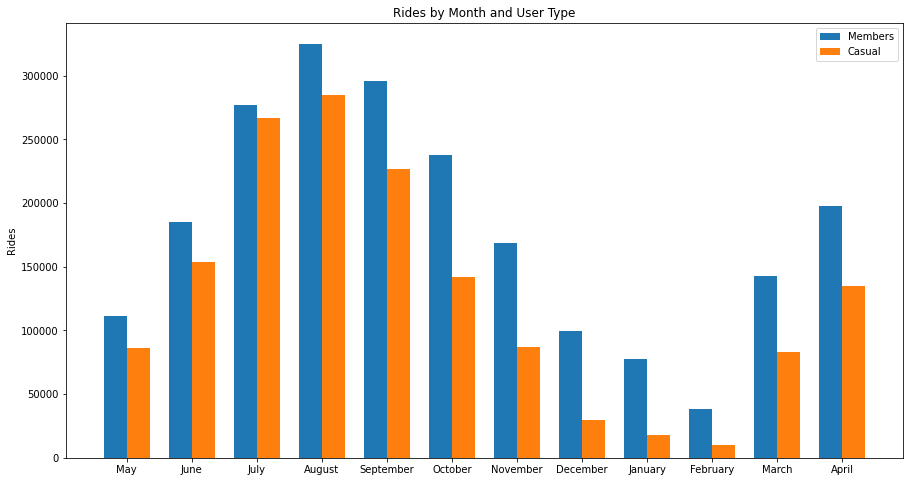

In [4]:
# Plot rides by month and user type 

labels = df['month_name'].unique()
 
x=np.arange(len(labels))

y1= mem
y2 = cas

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')

ax.set_ylabel('Rides')
ax.set_title('Rides by Month and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('images/month_user.png')

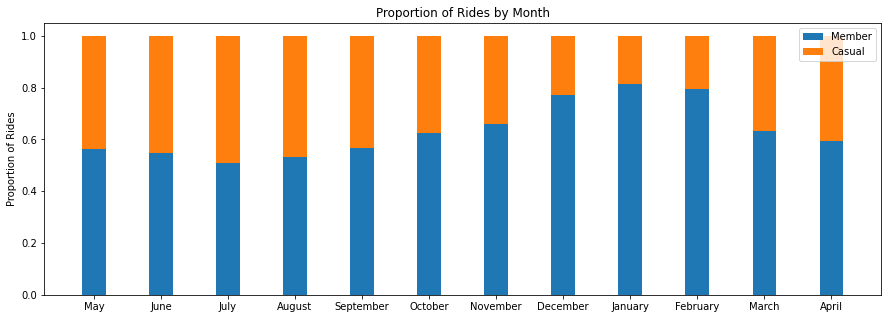

In [5]:
# Plot proportion of rides each month by user type

labels = df['month_name'].unique()

x=np.arange(len(labels))

y1= by_month['mem_prop']
y2 = by_month['cas_prop']

width = 0.35

fig, ax = plt.subplots(figsize = (15, 5))

ax.bar(labels, y1, width, label='Member')
ax.bar(labels, y2, width, bottom=y1,
       label='Casual')

ax.set_ylabel('Proportion of Rides')
ax.set_title('Proportion of Rides by Month')
ax.legend()

plt.savefig('images/prop_month_user.png')



In [6]:
# Create dataframe of mean ride times of member and casual riders by month


mem_dur_mean = df[df['member_casual'] == 'member'].groupby(['year','month'])['dur'].mean()
cas_dur_mean = df[df['member_casual'] == 'casual'].groupby(['year','month'])['dur'].mean()

In [15]:
# Calculate mean ride durations for members and casual riders

mean_fac = df[df['member_casual'] == 'casual']['dur'].mean()/df[df['member_casual'] == 'member']['dur'].mean()
mean_cas = df[df['member_casual'] == 'casual']['dur'].mean()
mean_mem = df[df['member_casual'] == 'member']['dur'].mean()

print('The mean casual ride length is ' + str(round(mean_cas,1)) + ' seconds, the mean member ride length is ' + str(round(mean_mem, 1)) + ' seconds. The mean casual ride length is ' + str(round(mean_fac, 2)) + ' times longer than the mean member ride.')

The mean casual ride length is 2667.0 seconds, the mean member ride length is 965.2 seconds. The mean casual ride length is 2.76 times longer than the mean member ride.


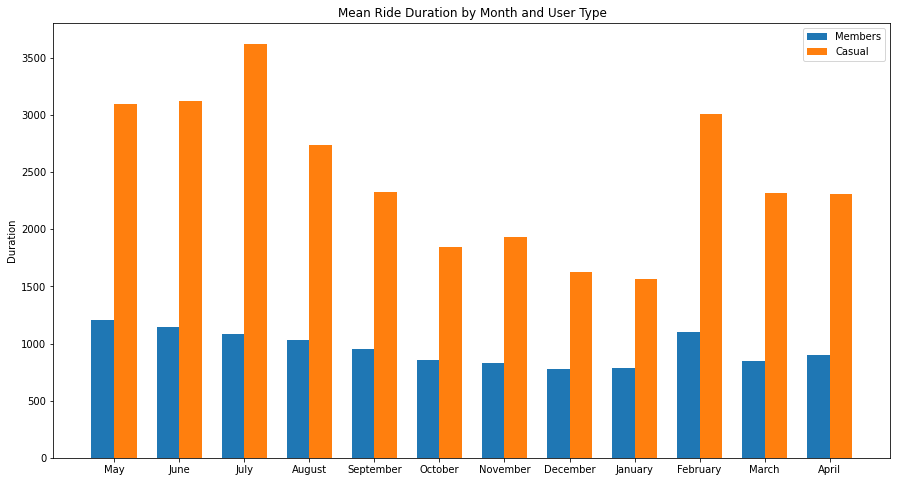

In [8]:
# Plot ride mean duration by month and user type 

labels = df['month_name'].unique()

x=np.arange(len(labels))

y1= mem_dur_mean
y2 = cas_dur_mean

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')


ax.set_ylabel('Duration')
ax.set_title('Mean Ride Duration by Month and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.savefig('images/dur_month_user.png')



In [9]:
# Create dataframe of total ride duration of member and casual riders by month

mem_dur_sum = df[df['member_casual'] == 'member'].groupby(['year','month', 'month_name'])['dur'].sum()
cas_dur_sum = df[df['member_casual'] == 'casual'].groupby(['year','month', 'month_name'])['dur'].sum()

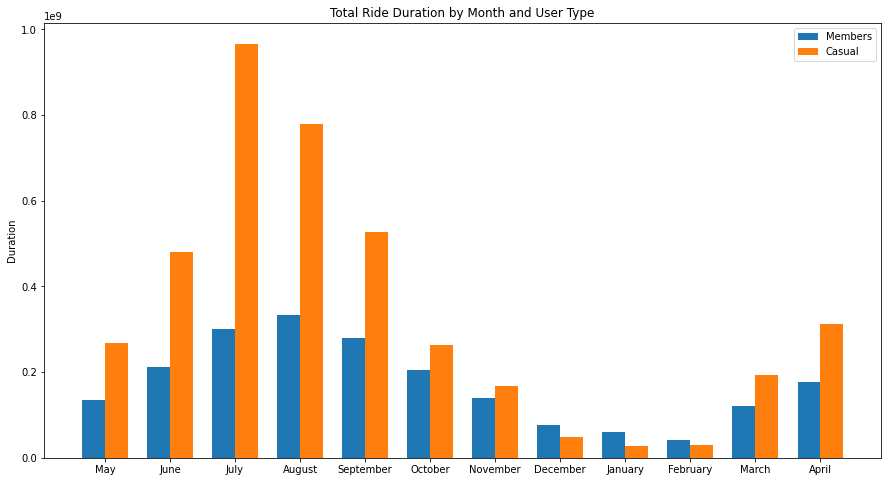

In [10]:
# Plot total ride duration by month and user type 

labels = mem_dur_sum.index.get_level_values(2).tolist()

x=np.arange(len(labels))

y1= mem_dur_sum
y2 = cas_dur_sum

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')

ax.set_ylabel('Duration')
ax.set_title('Total Ride Duration by Month and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('images/total_dur_month_user.png')



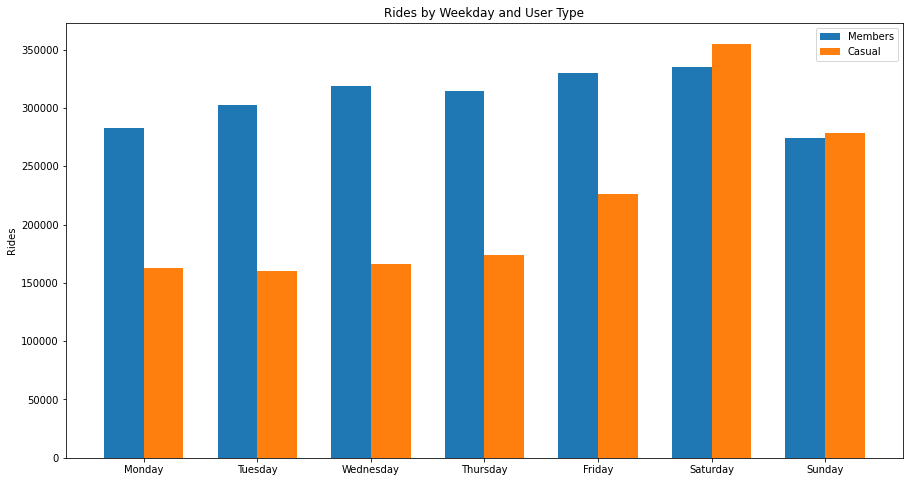

In [11]:
# Plot rides by weekday and user type 

df = df.sort_values(by = 'day')

mem_day = df[df['member_casual'] == 'member'].groupby(['day'])['ride_id'].count()

cas_day = df[df['member_casual'] == 'casual'].groupby('day')['ride_id'].count()

by_day = pd.DataFrame(data ={'day':df['day'].unique().tolist(), 'mem_rides_day':mem_day.tolist(), 'cas_rides_day':cas_day.tolist()})

by_day['total_rides'] = by_day.apply(lambda x: x['mem_rides_day'] + x['cas_rides_day'], axis = 1)

by_day['mem_prop'] = by_day.apply(lambda x: x['mem_rides_day']/x['total_rides'], axis = 1)
by_day['cas_prop'] = by_day.apply(lambda x: x['cas_rides_day']/x['total_rides'], axis = 1)



labels = df['day_name'].unique()

x=np.arange(len(labels))

y1= mem_day
y2 = cas_day

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')


ax.set_ylabel('Rides')
ax.set_title('Rides by Weekday and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('images/day_user.png')


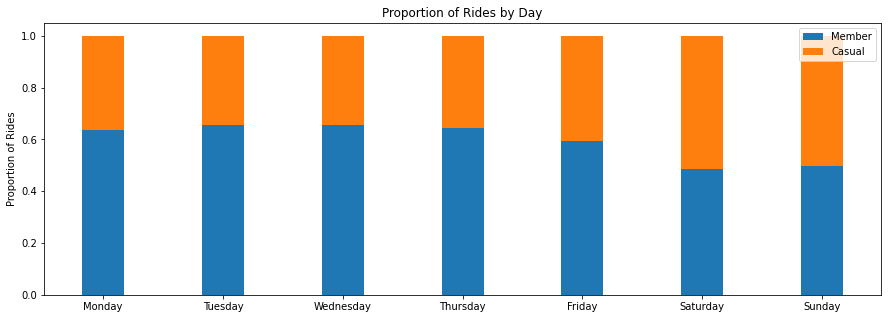

In [12]:
# Plot proportion of rides each day by user type

labels = df['day_name'].unique()

x=np.arange(len(labels))

y1= by_day['mem_prop']
y2 = by_day['cas_prop']

width = 0.35

fig, ax = plt.subplots(figsize = (15, 5))

ax.bar(labels, y1, width, label='Member')
ax.bar(labels, y2, width, bottom=y1,
       label='Casual')

ax.set_ylabel('Proportion of Rides')
ax.set_title('Proportion of Rides by Day')
ax.legend()

plt.savefig('images/prop_day_user.png')

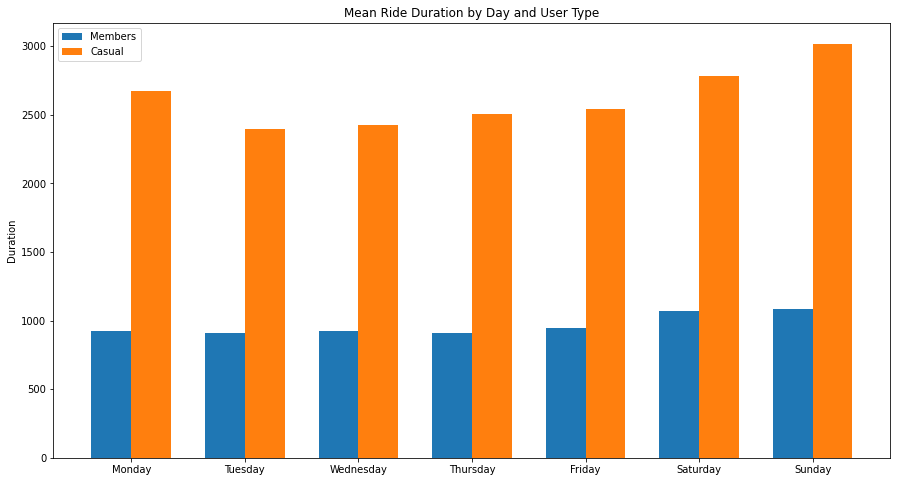

In [13]:
# Plot ride mean duration by day and user type 

mem_dur_mean_day = df[df['member_casual'] == 'member'].groupby('day')['dur'].mean()
cas_dur_mean_day = df[df['member_casual'] == 'casual'].groupby('day')['dur'].mean()

labels = df['day_name'].unique()

x=np.arange(len(labels))

y1= mem_dur_mean_day
y2 = cas_dur_mean_day

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')

ax.set_ylabel('Duration')
ax.set_title('Mean Ride Duration by Day and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('images/mean_dur_day_user.png')


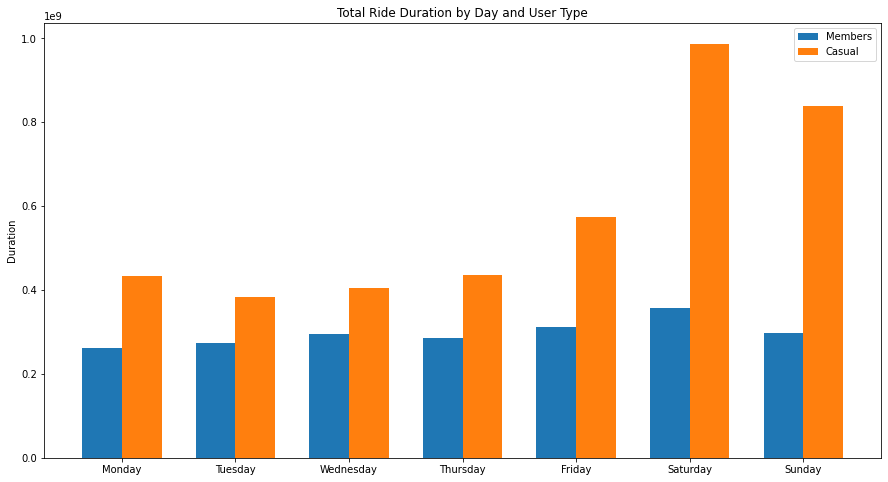

In [14]:
# Plot total ride duration by day and user type 

mem_dur_sum_day = df[df['member_casual'] == 'member'].groupby('day')['dur'].sum()
cas_dur_sum_day = df[df['member_casual'] == 'casual'].groupby('day')['dur'].sum()

labels = df['day_name'].unique()

x=np.arange(len(labels))

y1= mem_dur_sum_day
y2 = cas_dur_sum_day

width = 0.35

fig, ax = plt.subplots(figsize = (15, 8))

rects1 = ax.bar(x - width/2, y1, width, label='Members')
rects2 = ax.bar(x + width/2, y2, width, label='Casual')

ax.set_ylabel('Duration')
ax.set_title('Total Ride Duration by Day and User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('images/total_dur_day_user.png')